In [1]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv(r'..\Data\data.csv')
# Group by CustomerId and find if any fraudulent transactions exist for each customer
df['RiskLabel'] = df.groupby('CustomerId')['FraudResult'].transform(lambda x: 'high-risk' if x.max() == 1 else 'low-risk')

# Check the result
df[['CustomerId', 'FraudResult', 'RiskLabel']].drop_duplicates().head()


,CustomerId,FraudResult,RiskLabel
0,CustomerId_4406,0,low-risk
2,CustomerId_4683,0,low-risk
3,CustomerId_988,0,low-risk
5,CustomerId_1432,0,low-risk
6,CustomerId_2858,0,low-risk


In [2]:
#Overview of the Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [3]:
#Summary Statistics for Numerical Features
print(df[['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']].describe())


             Amount         Value  CountryCode  PricingStrategy   FraudResult
count  9.566200e+04  9.566200e+04      95662.0     95662.000000  95662.000000
mean   6.717846e+03  9.900584e+03        256.0         2.255974      0.002018
std    1.233068e+05  1.231221e+05          0.0         0.732924      0.044872
min   -1.000000e+06  2.000000e+00        256.0         0.000000      0.000000
25%   -5.000000e+01  2.750000e+02        256.0         2.000000      0.000000
50%    1.000000e+03  1.000000e+03        256.0         2.000000      0.000000
75%    2.800000e+03  5.000000e+03        256.0         2.000000      0.000000
max    9.880000e+06  9.880000e+06        256.0         4.000000      1.000000


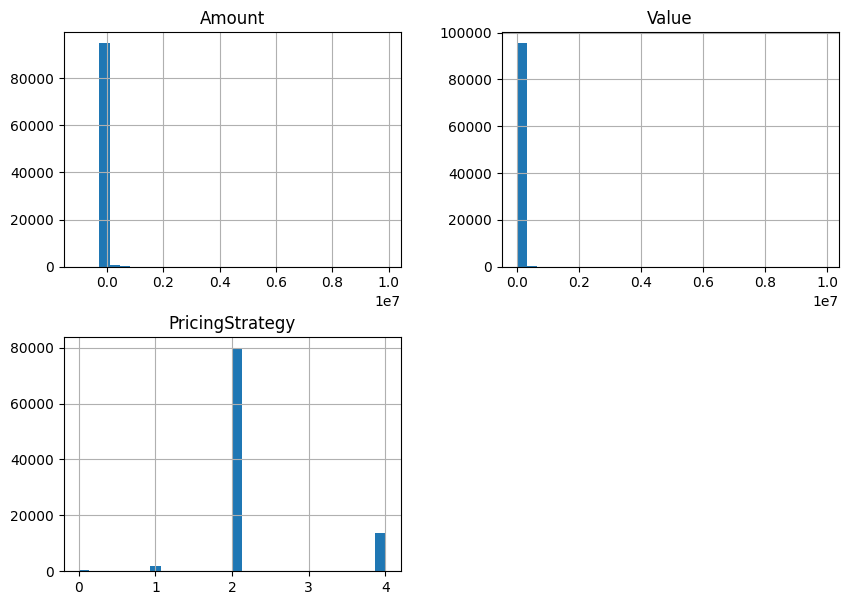

In [4]:
#Distribution of Numerical Features
import matplotlib.pyplot as plt

df[['Amount', 'Value', 'PricingStrategy']].hist(bins=30, figsize=(10, 7))
plt.show()


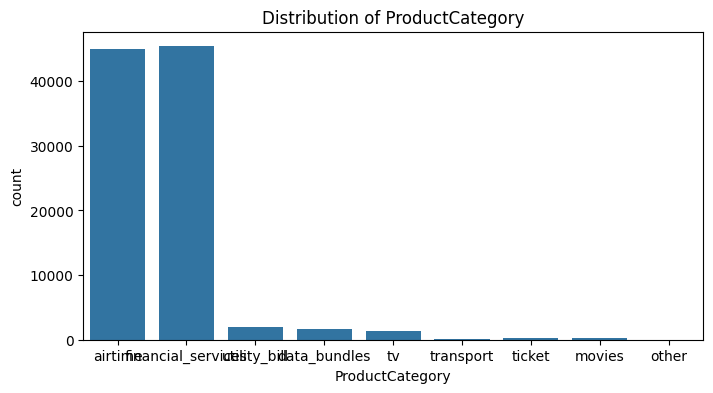

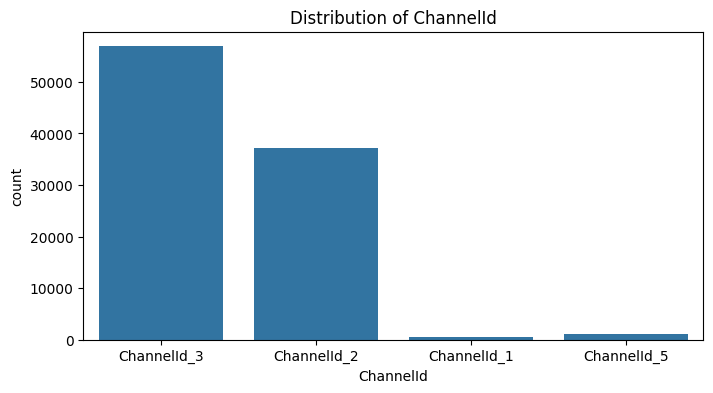

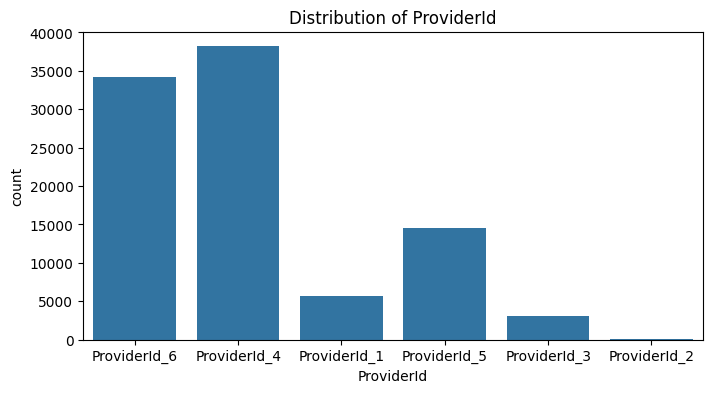

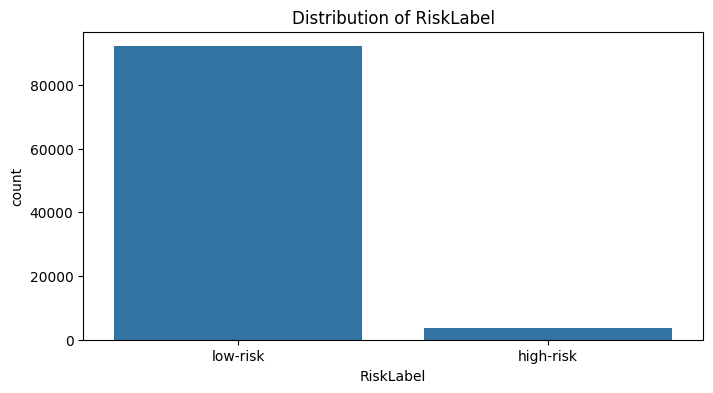

In [5]:
#Distribution of Categorical Features
import seaborn as sns

categorical_columns = ['ProductCategory', 'ChannelId', 'ProviderId', 'RiskLabel']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


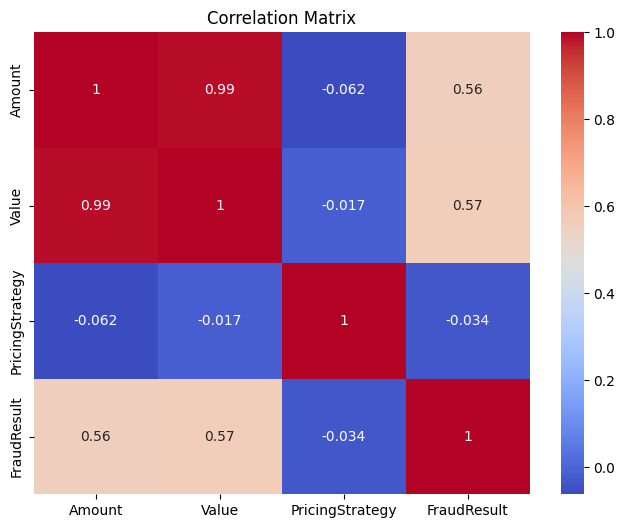

In [6]:
#Correlation Analysis
import seaborn as sns

correlation_matrix = df[['Amount', 'Value', 'PricingStrategy', 'FraudResult']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


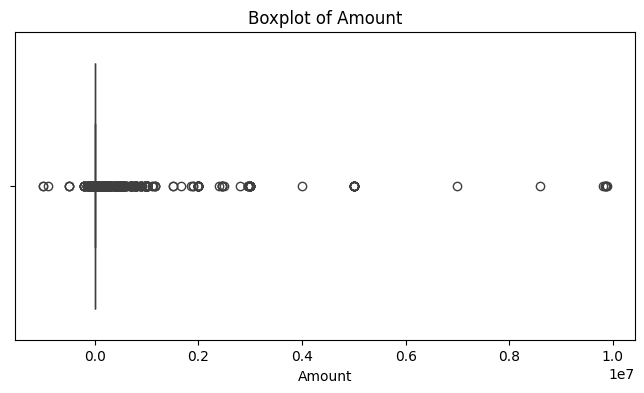

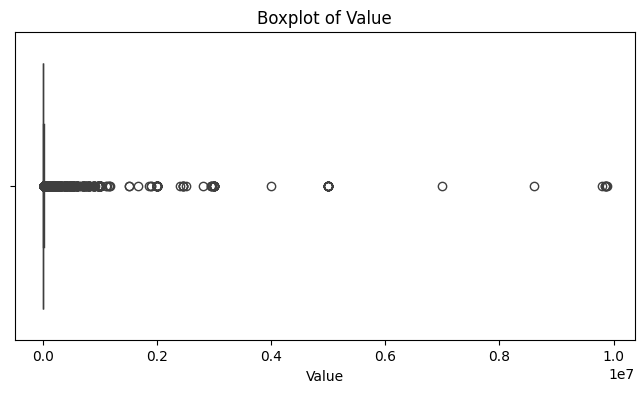

In [7]:
#Outlier Detection
for col in ['Amount', 'Value']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


d:\Data Science\10acadamy\plony_env\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

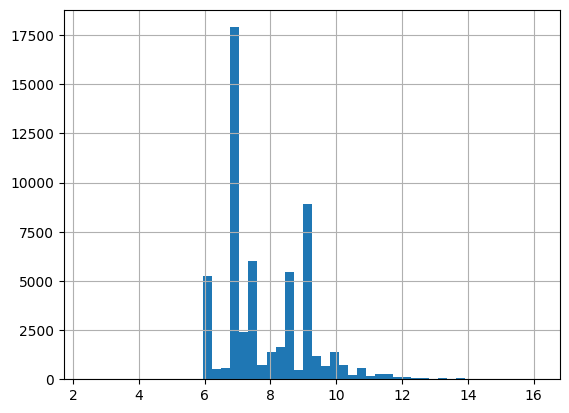

In [40]:
import numpy as np

# Apply log transformation to 'Amount' column
df['LogAmount'] = np.log1p(df['Amount'])  # log1p is used to avoid issues with log(0)

# Check the distribution after log transformation
df['LogAmount'].hist(bins=50)


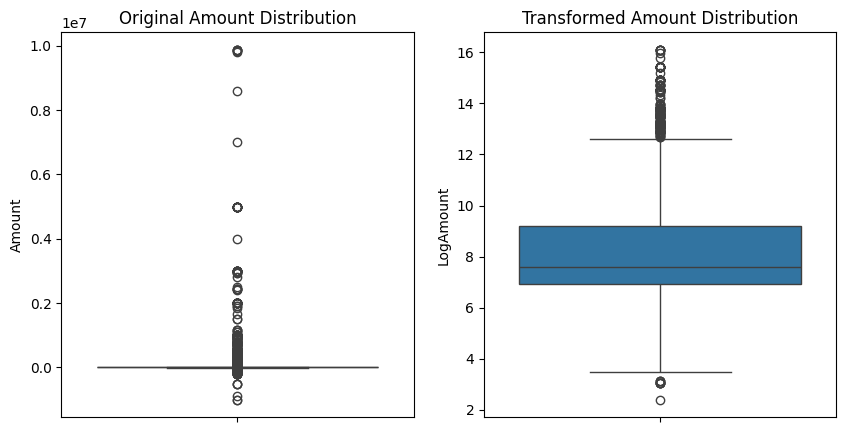

In [41]:
# Plot original vs transformed distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Before Transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['Amount'])
plt.title('Original Amount Distribution')

# After Transformation (Log or Winsorized)
plt.subplot(1, 2, 2)
sns.boxplot(df['LogAmount'] if 'LogAmount' in df.columns else df['CappedAmount'])
plt.title('Transformed Amount Distribution')

plt.show()


<Axes: >

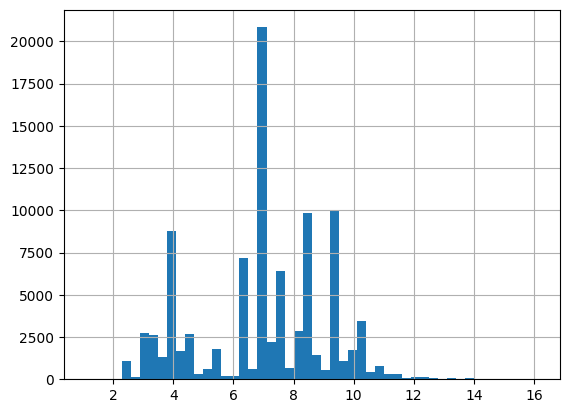

In [42]:
import numpy as np

# Apply log transformation to 'Value' column
df['LogValue'] = np.log1p(df['Value'])  # log1p is used to avoid issues with log(0)

# Check the distribution after log transformation
df['LogValue'].hist(bins=50)


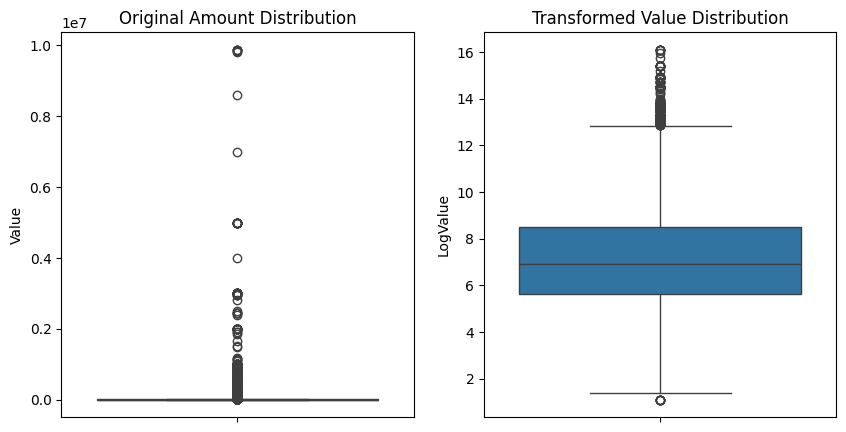

In [43]:
# Plot original vs transformed distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Before Transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['Value'])
plt.title('Original Amount Distribution')

# After Transformation (Log or Winsorized)
plt.subplot(1, 2, 2)
sns.boxplot(df['LogValue'] if 'LogValue' in df.columns else df['CappedValue'])
plt.title('Transformed Value Distribution')

plt.show()


In [44]:
df['TotalTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('sum')


In [45]:
df['AvgTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('mean')


In [46]:
df['TransactionCount'] = df.groupby('CustomerId')['TransactionId'].transform('count')


In [47]:
#Transaction Count
df['TransactionCount'] = df.groupby('CustomerId')['TransactionId'].transform('count')


In [48]:
#Extract Features from Transaction Time:
df['TransactionHour'] = pd.to_datetime(df['TransactionStartTime']).dt.hour
df['TransactionDay'] = pd.to_datetime(df['TransactionStartTime']).dt.day
df['TransactionMonth'] = pd.to_datetime(df['TransactionStartTime']).dt.month
df['TransactionYear'] = pd.to_datetime(df['TransactionStartTime']).dt.year


In [49]:
# Encode Categorical Variables
#One-Hot Encoding Use this when categories are non-ordinal. It will create a binary column for each category
df = pd.get_dummies(df, columns=['CurrencyCode', 'ProductCategory', 'CountryCode', 'ChannelId'], drop_first=True)


In [50]:
#Label Encoding:Useful when categorical features have ordinal relationships.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['RiskLabel'] = le.fit_transform(df['RiskLabel'])  # Example for RiskLabel

In [51]:
#Standard Deviation of Transaction Amounts
df['StdTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('std').fillna(0)


In [54]:
# For categorical features, you could fill with the mode or use more sophisticated imputation techniques like KNN Imputer:

df['ProductCategory'].fillna(df['ProductCategory'].mode()[0], inplace=True)


KeyError: 'ProductCategory'

In [55]:
#Normalize/Standardize Numerical Features:Scaling numerical features is important when using distance-based models (e.g., SVM, k-NN) or ensuring that all features are on a similar scale.Normalization (scales to [0, 1]):

#Use MinMaxScaler to normalize features:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Amount', 'TotalTransactionAmount', 'AvgTransactionAmount']] = scaler.fit_transform(df[['Amount', 'TotalTransactionAmount', 'AvgTransactionAmount']])

In [56]:
#Standardization (mean = 0, std = 1):Use StandardScaler to standardize features:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Amount', 'TotalTransactionAmount', 'AvgTransactionAmount']] = scaler.fit_transform(df[['Amount', 'TotalTransactionAmount', 'AvgTransactionAmount']])


In [58]:
#Feature Engineering using Xverse and Weight of Evidence (WOE):For advanced feature engineering, you can use the following libraries:
#Xverse: It automates the creation of interaction terms and other engineered features.
from xverse.transformer import MonotonicBinning
binning = MonotonicBinning()
df_transformed = binning.fit_transform(df, ['Amount'])

AttributeError: 'list' object has no attribute 'shape'

In [59]:
#Weight of Evidence (WOE) and Information Value (IV): This is useful for calculating the predictive power of features, especially for binary classification (e.g., fraud detection).

from woe.eval import woe_bin
iv_data = woe_bin(df, 'FraudResult')  # Calculate WOE and IV based on target 'FraudRes

ImportError: cannot import name 'woe_bin' from 'woe.eval' (d:\Data Science\10acadamy\plony_env\Lib\site-packages\woe\eval.py)

In [60]:
#Implementation of Feature Engineering Steps
#Create Aggregate Features
import pandas as pd

# Assuming 'df' is your DataFrame
# Create aggregate features for each customer
df['TotalTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('sum')
df['AvgTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('mean')
df['TransactionCount'] = df.groupby('CustomerId')['TransactionId'].transform('count')
df['StdTransactionAmount'] = df.groupby('CustomerId')['Amount'].transform('std').fillna(0)  # Fill NaN with 0


In [61]:
#Extract Features from Transaction Time
# Convert 'TransactionStartTime' to datetime format if it's not already
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract features from 'TransactionStartTime'
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year


In [62]:
# Encode Categorical Variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding for categorical variables
categorical_columns = ['CurrencyCode', 'ProductCategory', 'CountryCode', 'ChannelId']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Label Encoding for the target variable
le = LabelEncoder()
df['RiskLabel'] = le.fit_transform(df['RiskLabel'])  # Assuming 'RiskLabel' is your target


KeyError: "None of [Index(['CurrencyCode', 'ProductCategory', 'CountryCode', 'ChannelId'], dtype='object')] are in the [columns]"

In [63]:
#Handle Missing Values
# Impute missing values for numerical features
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['TotalTransactionAmount'].fillna(df['TotalTransactionAmount'].median(), inplace=True)
df['AvgTransactionAmount'].fillna(df['AvgTransactionAmount'].median(), inplace=True)

# Impute missing values for categorical features with mode
df['ProductCategory'].fillna(df['ProductCategory'].mode()[0], inplace=True)
df['CurrencyCode'].fillna(df['CurrencyCode'].mode()[0], inplace=True)

# Remove rows with missing 'TransactionStartTime' if any
df.dropna(subset=['TransactionStartTime'], inplace=True)


C:\Users\eep\AppData\Local\Temp\ipykernel_18448\1883677433.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)
C:\Users\eep\AppData\Local\Temp\ipykernel_18448\1883677433.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

KeyError: 'ProductCategory'

In [ ]:
#Normalize/Standardize Numerical Features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Choose one scaling method, here is an example of normalization
scaler = MinMaxScaler()
numerical_columns = ['Amount', 'TotalTransactionAmount', 'AvgTransactionAmount', 'StdTransactionAmount']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Alternatively, to standardize:
# scaler = StandardScaler()
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [ ]:
#Final DataFrame Check
print(df.info())  # Check the structure of the DataFrame
print(df.describe())  # Get summary statistics
